2022-05-05 17:08:16.937708: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


viz_batch (2, 5, 3, 224, 224)


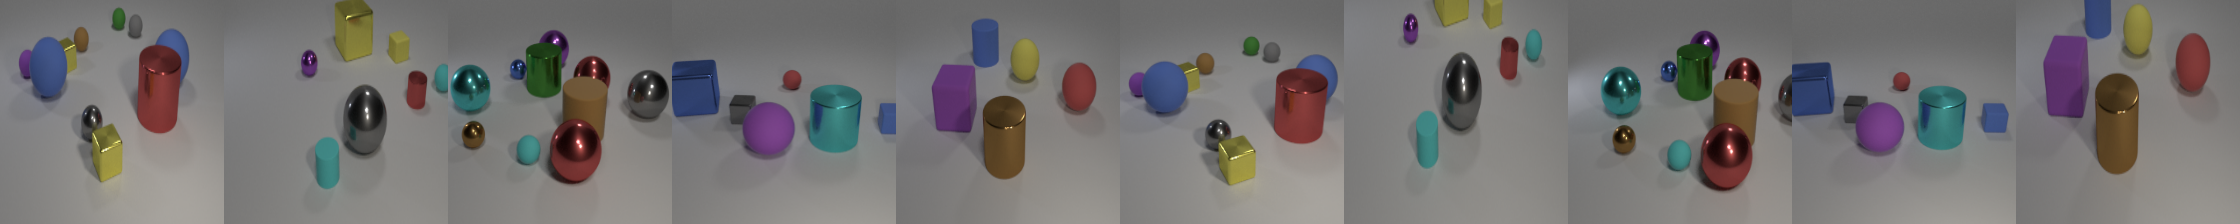

Epoch 0
Train 0
large (2, 4, 3, 224, 224)


/tmp/ipykernel_26635/111161884.py:64: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755888534/work/torch/csrc/utils/tensor_numpy.cpp:178.)
  large = unnormalize_pt(torch.from_numpy(large), **cfg.data.normalize)


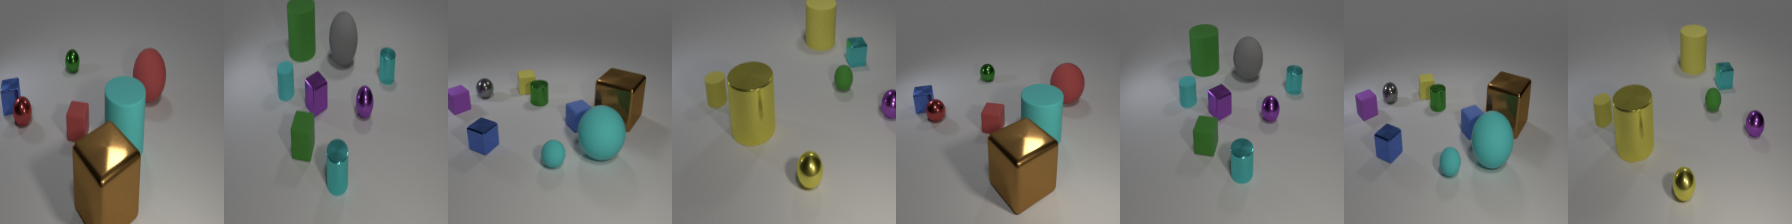

small (4, 4, 3, 96, 96)


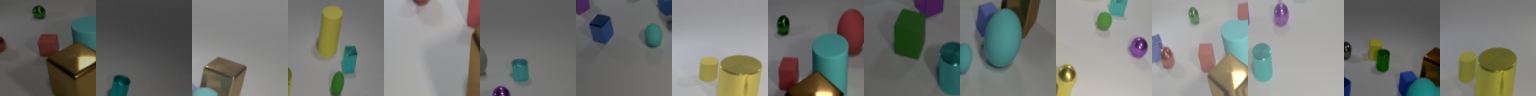

Train 1
large (2, 4, 3, 224, 224)


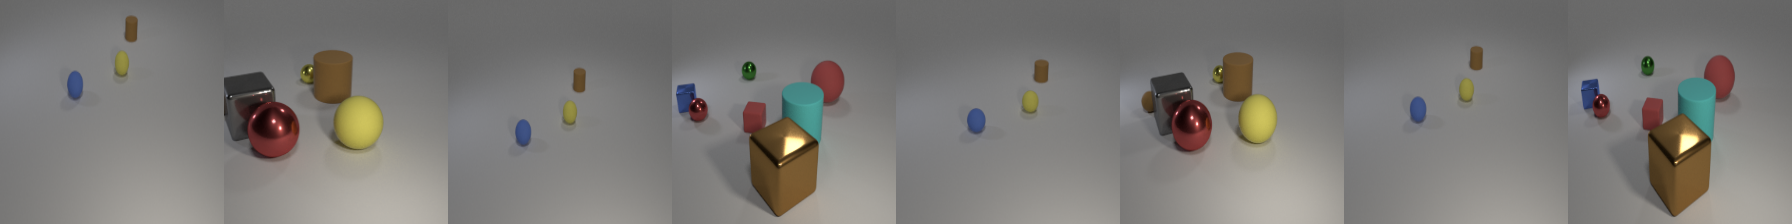

small (4, 4, 3, 96, 96)


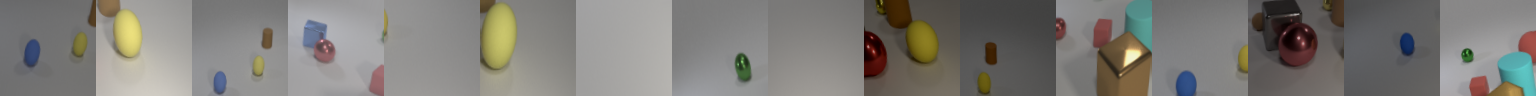

Val 0
large (2, 4, 3, 224, 224)


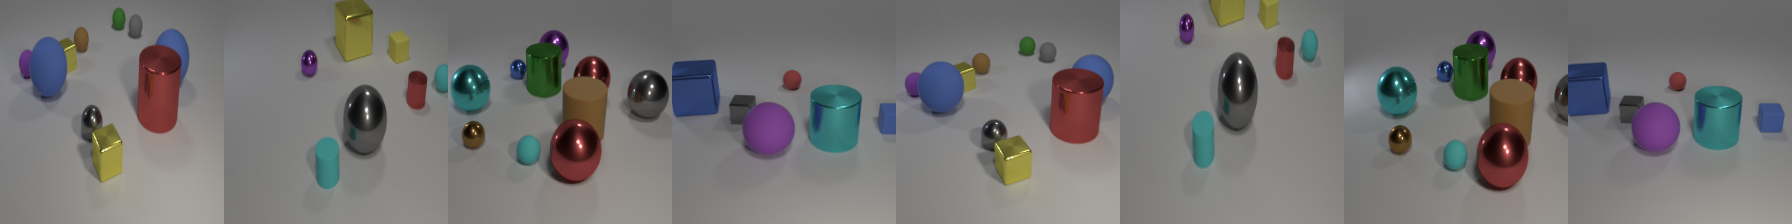

small (4, 4, 3, 96, 96)


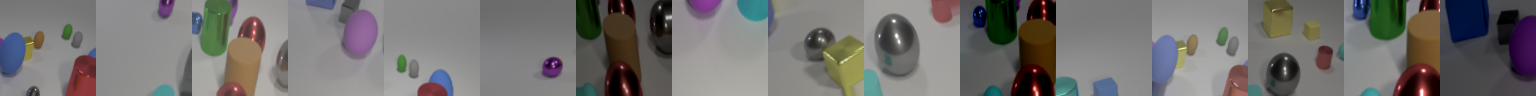

Val 1
large (2, 2, 3, 224, 224)


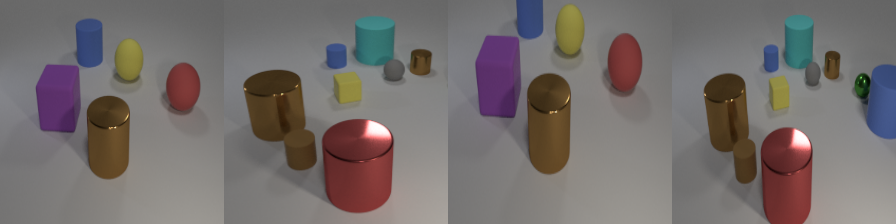

small (4, 2, 3, 96, 96)


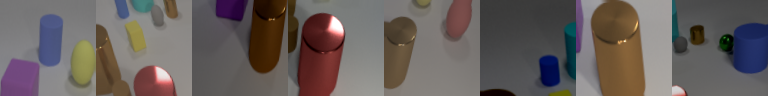

Epoch 1
Train 0
large (2, 4, 3, 224, 224)


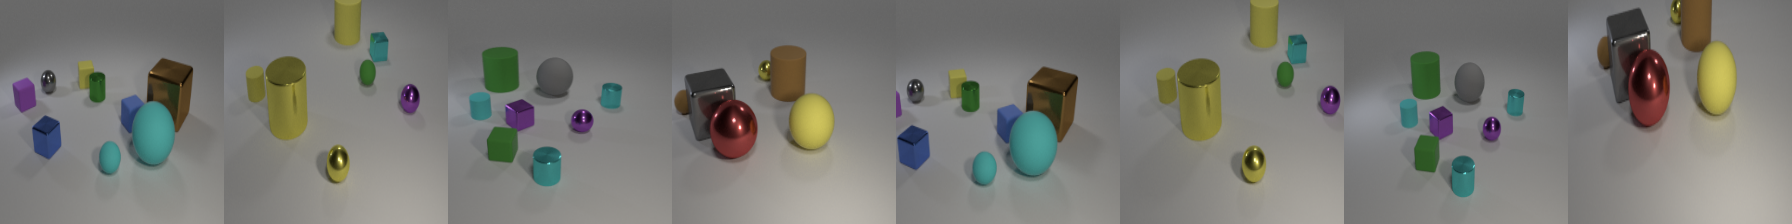

small (4, 4, 3, 96, 96)


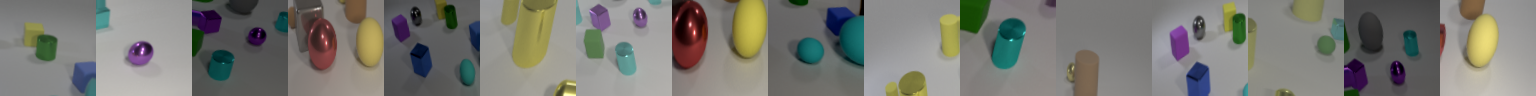

Train 1
large (2, 4, 3, 224, 224)


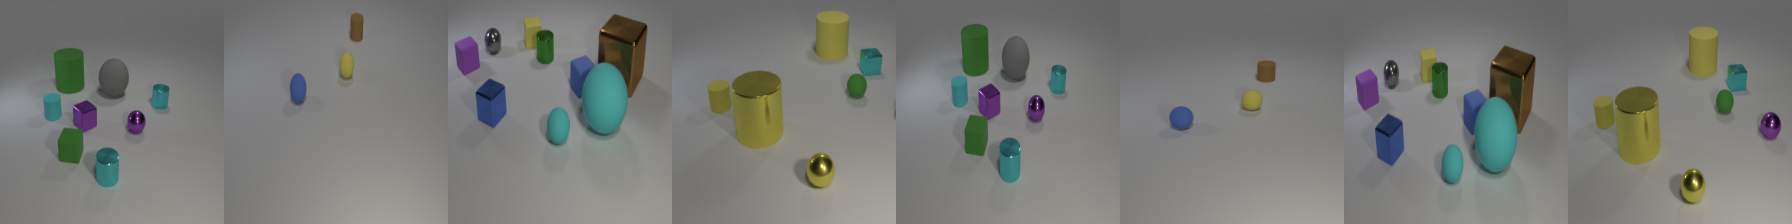

small (4, 4, 3, 96, 96)


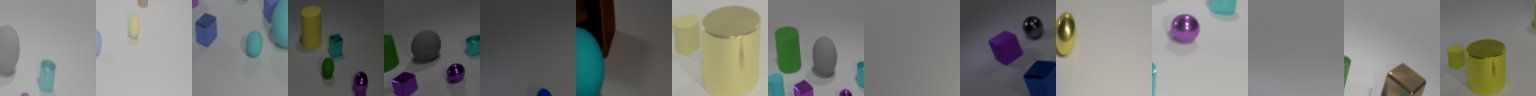

Val 0
large (2, 4, 3, 224, 224)


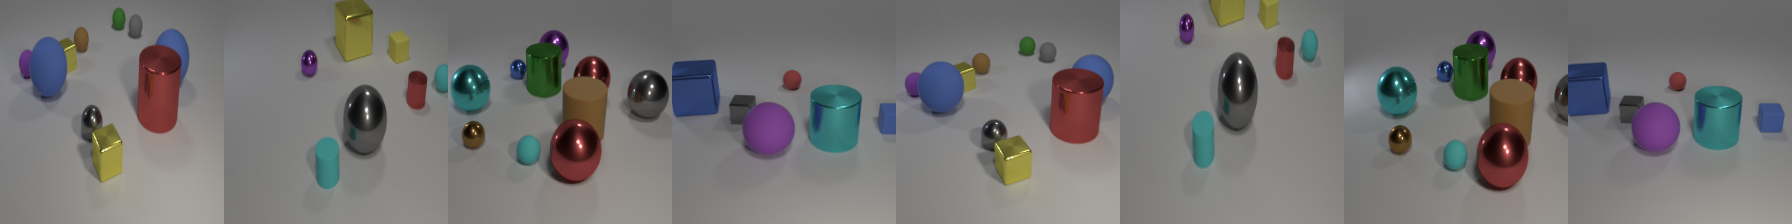

small (4, 4, 3, 96, 96)


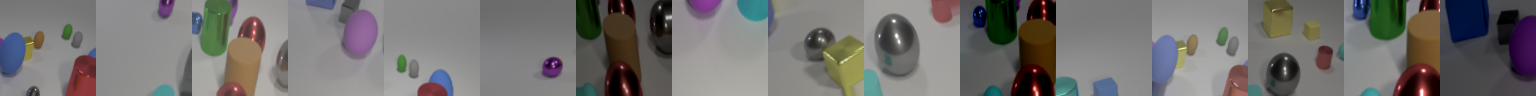

Val 1
large (2, 2, 3, 224, 224)


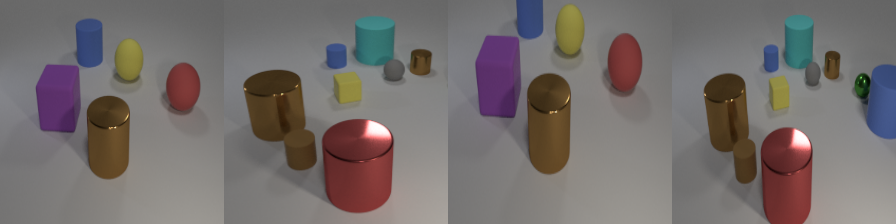

small (4, 2, 3, 96, 96)


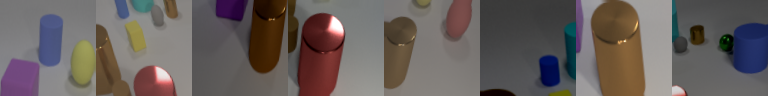

In [1]:
from itertools import islice

import PIL.Image
import torch
from einops import rearrange
from omegaconf import OmegaConf
from osc.data.utils import unnormalize_pt
from osc.train import build_dataset_train, build_dataset_val, get_viz_batch
from torchvision.transforms.functional import to_pil_image

cfg = OmegaConf.create(
    {
        "data": {
            "name": "CLEVR10",
            "root": "~/multi-object-datasets",
            "crops": {
                "large": {
                    "num": 2,
                    "size": [224, 224],
                    "area": [0.6, 1.0],
                    "ratio": [0.66, 1.5],
                    "strength": 0.0,
                },
                "small": {
                    "num": 4,
                    "size": [96, 96],
                    "area": [0.08, 0.25],
                    "ratio": [0.66, 1.5],
                    "strength": 0.5,
                },
            },
            "train": {"seed": 0, "max_samples": 6, "shuffle_batches": 50},
            "val": {"seed": 6676759028237078, "max_samples": 6, "viz_samples": 5},
            "test": {
                "vqa": {
                    "max_samples": 10,
                    "split": 0.75,
                    "pos_weight": 14.0,
                    "num_steps": 10000,
                    "seed": 759443315,
                },
                "segmentation": {"max_samples": None},
            },
            "normalize": {"mean": [0.5, 0.5, 0.5], "std": [0.5, 0.5, 0.5]},
        },
        "training": {"batch_size": 4, "shuffle_batches": 50},
    }
)
ds_train = build_dataset_train(cfg)
ds_val = build_dataset_val(cfg)
viz_batch = get_viz_batch(cfg, ds_val)

print('viz_batch', tuple(viz_batch.shape))
viz_batch = unnormalize_pt(viz_batch, **cfg.data.normalize)
display(to_pil_image(rearrange(viz_batch, "B A C H W -> C H (B A W)")))

for epoch in range(2):
    print("Epoch", epoch)
    
    for batch, (large, small) in enumerate(islice(ds_train, 2)):
        print("Train", batch)
        
        print('large', tuple(large.shape))
        large = unnormalize_pt(torch.from_numpy(large), **cfg.data.normalize)
        display(to_pil_image(rearrange(large, "B A C H W -> C H (B A W)")))
        
        print('small', tuple(small.shape))
        small = unnormalize_pt(torch.from_numpy(small), **cfg.data.normalize)
        display(to_pil_image(rearrange(small, "B A C H W -> C H (B A W)")))
            
    for batch, (large, small) in enumerate(islice(ds_val.as_numpy_iterator(), 2)):
        print("Val", batch)
        
        print('large', tuple(large.shape))
        large = unnormalize_pt(torch.from_numpy(large), **cfg.data.normalize)
        display(to_pil_image(rearrange(large, "B A C H W -> C H (B A W)")))
        
        print('small', tuple(small.shape))
        small = unnormalize_pt(torch.from_numpy(small), **cfg.data.normalize)
        display(to_pil_image(rearrange(small, "B A C H W -> C H (B A W)")))